In [ ]:
!pip install pandas matplotlib seaborn missingno scikit-learn

In [2]:
# tools
import pandas as pd
import missingno as msno

In [56]:
# functions
from pathlib import Path
from sklearn.metrics import r2_score

In [4]:
# plot
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [40]:
data = Path('../data/raw/clicks.csv.gzip')
clicks = (pd.read_csv(data, compression='gzip', parse_dates=['created'])
            .assign(created = lambda df: df.created.dt.floor('h').dt.tz_convert('America/Montevideo'),
                    weekend = lambda df: df.created.dt.weekday.map(lambda wd: 1 if wd in [5,6] else 0)))

In [41]:
clicks.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type', 'ref_hash', 'weekend'],
      dtype='object')

## Analisis drescriptivo

### Missing data

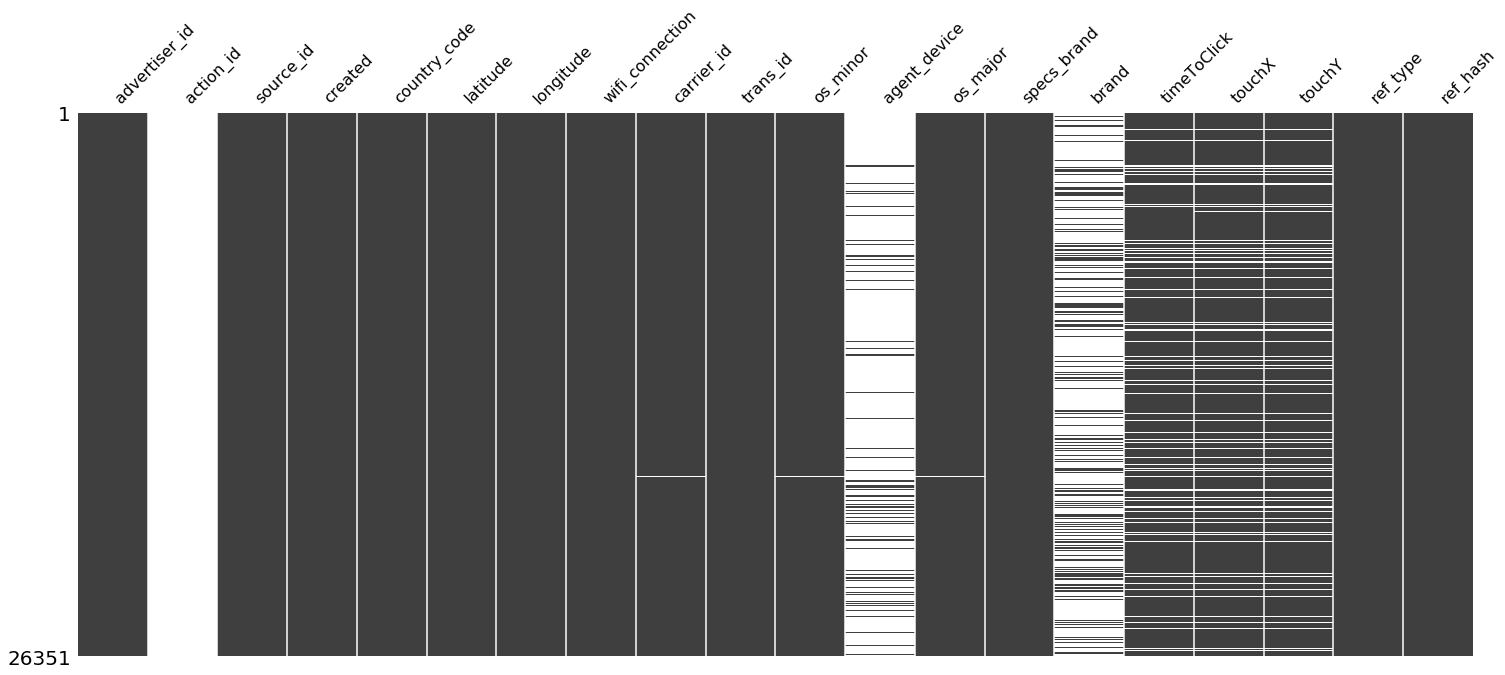

In [7]:
msno.matrix(clicks, sparkline=False)
plt.savefig('../assets/clicks_missing.png')
plt.savefig('../assets/clicks_missing.svg')
plt.show()

## Analisis por columna

### Created

In [24]:
clicks.created.describe()

count                         26351
unique                          153
top       2019-03-07 20:00:00-03:00
freq                           2172
first     2019-03-04 22:00:00-03:00
last      2019-03-13 20:00:00-03:00
Name: created, dtype: object

In [28]:
clicks.country_code.unique()

array([6333597102633388268])

In [42]:
clicks.groupby(clicks.created.dt.floor('d')).size()

created
2019-03-04 00:00:00-03:00       9
2019-03-05 00:00:00-03:00      23
2019-03-06 00:00:00-03:00      13
2019-03-07 00:00:00-03:00    4200
2019-03-08 00:00:00-03:00    2826
2019-03-09 00:00:00-03:00    3530
2019-03-10 00:00:00-03:00    3855
2019-03-11 00:00:00-03:00    4286
2019-03-12 00:00:00-03:00    4856
2019-03-13 00:00:00-03:00    2753
dtype: int64

In [68]:
wdwe = (clicks.groupby([clicks.weekend, clicks.created.dt.hour]).size().to_frame('clicks')
              .reset_index())

In [69]:
wdwe = (wdwe.pivot(index='weekend', columns='created', values='clicks')
            .fillna(0)
            .unstack()
            .to_frame('clicks')
            .reset_index())

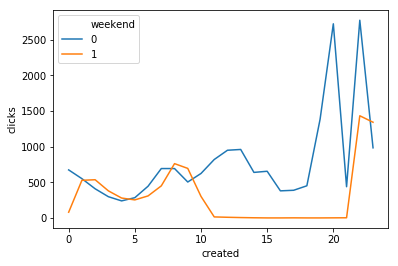

In [70]:
sns.lineplot('created', 'clicks', hue='weekend', data=wdwe)

In [73]:
ts0 = wdwe.query('weekend==0').clicks.values
ts1 = wdwe.query('weekend==1').clicks.values

In [74]:
r2_score(ts0, ts1)

-0.5829651370576505

In [37]:
clicks.groupby(clicks.created.dt.hour).size()

created
0      754
1     1079
2      945
3      678
4      518
5      537
6      754
7     1143
8     1455
9     1199
10     926
11     834
12     959
13     966
14     641
15     655
16     380
17     389
18     451
19    1386
20    2726
21     440
22    4209
23    2327
dtype: int64

In [6]:
clicks.advertiser_id.unique() # 7 Unique advertiser ids

array([2, 0, 5, 3, 1, 8, 7], dtype=int64)

In [7]:
clicks.source_id.unique()

array([ 4,  0,  3,  1,  2,  5,  6,  8, 10,  7,  9], dtype=int64)

In [8]:
clicks.country_code.unique() # ALL values are the same

array([6333597102633388268], dtype=int64)

In [1]:
plt.scatter(clicks.latitude, clicks.longitude)

NameError: name 'plt' is not defined

In [23]:
clicks.wifi_connection.unique() # All false

array([False])

In [28]:
clicks.carrier_id.unique() # 55 unique carriers wo NaN

array([  1.,   4.,   6.,  45.,  27.,  nan,  19.,  18.,   3.,  13.,  24.,
        15.,  10.,  21.,   0.,   9.,  12.,  25.,   5.,  30.,   2.,  29.,
        67.,  14.,  74.,  26.,  75.,  33.,  22.,  28.,  65.,  76.,  11.,
        17.,  91.,  77.,  69.,  93.,  39.,  31., 102., 103., 105., 106.,
        35.,  52.,  59.,  48.,  37., 113.,  55.,  34., 115., 112.,  80.,
       116.])

In [26]:
clicks.carrier_id.isna().sum()

11

In [31]:
clicks.trans_id.nunique() # Transaction ids are unique for each register

26351

In [38]:
clicks.os_minor.unique() # 28 OS versions

array([6.76813741e+18, 3.02521945e+18, 5.97565607e+18, 3.37863995e+18,
                  nan, 6.39156710e+18, 7.55367603e+18, 6.66662581e+17,
       3.51153782e+18, 3.87570706e+18, 3.39996160e+18, 6.38096315e+18,
       3.13860584e+18, 8.50225519e+18, 4.21339124e+18, 3.17802727e+18,
       7.72856597e+18, 8.61372192e+18, 4.10688972e+18, 7.20901744e+18,
       5.47606382e+18, 4.46389214e+18, 2.45575206e+18, 9.08108195e+18,
       4.20691218e+18, 9.17554878e+17, 6.42365938e+18, 7.83746445e+18,
       7.69994994e+18])

In [52]:
clicks.os_minor.value_counts()

3.378640e+18    6922
6.768137e+18    3747
5.975656e+18    3683
3.511538e+18    3257
6.391567e+18    3093
3.025219e+18    3047
3.875707e+18     651
3.399962e+18     591
7.553676e+18     576
6.666626e+17     445
4.213391e+18      79
4.106890e+18      44
8.613722e+18      36
8.502255e+18      35
3.178027e+18      34
3.138606e+18      22
7.209017e+18      20
7.728566e+18      13
2.455752e+18      10
9.175549e+17       8
6.380963e+18       8
4.463892e+18       5
4.206912e+18       3
5.476064e+18       3
6.423659e+18       2
9.081082e+18       2
7.699950e+18       2
7.837464e+18       1
Name: os_minor, dtype: int64

In [42]:
clicks.agent_device.nunique()

190

[]

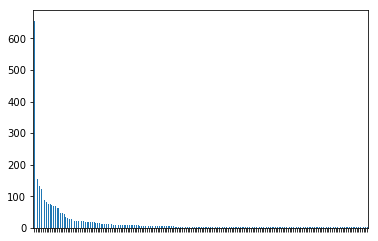

In [49]:
clicks.agent_device.value_counts().plot(kind='bar').set_xticklabels([])

In [56]:
clicks.os_major.unique() # 12 unique

array([3.07284934e+18, 1.77408510e+18, 4.56645391e+18,            nan,
       7.45240570e+18, 1.56383029e+18, 5.74580514e+18, 6.69357851e+18,
       7.49973195e+18, 2.83531211e+18, 4.07221146e+18, 7.43648083e+17,
       6.92818305e+18])

In [57]:
clicks.os_major.value_counts()

3.072849e+18    7430
4.566454e+18    6922
1.774085e+18    6304
7.452406e+18    3669
5.745805e+18     818
6.693579e+18     616
1.563830e+18     445
2.835312e+18      64
7.499732e+18      41
4.072211e+18      20
7.436481e+17       8
6.928183e+18       2
Name: os_major, dtype: int64

In [59]:
clicks.specs_brand.unique() # 5

array([2733035977666442898,  392184377613098015, 8930605132947907029,
       3855167788531275156, 5675295985273558497])

In [61]:
clicks.specs_brand.value_counts()

392184377613098015     16172
2733035977666442898    10164
8930605132947907029       10
3855167788531275156        4
5675295985273558497        1
Name: specs_brand, dtype: int64

In [63]:
clicks.brand.value_counts() # 13

2.0     2027
0.0     1917
1.0     1521
4.0      240
3.0      186
5.0      129
6.0      124
7.0       32
9.0       31
8.0       16
10.0       8
12.0       3
13.0       1
Name: brand, dtype: int64

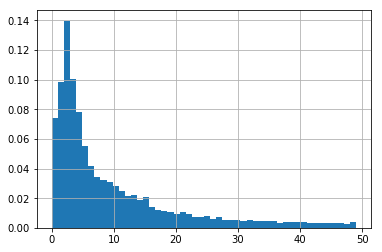

In [10]:
clicks.timeToClick.fillna(999).map(round).loc[lambda s: s < 50].hist(bins=50, density=True)

In [128]:
temp = (clicks.dropna(subset=['timeToClick'])
              .assign(timeToClick=lambda df: df.timeToClick.map(round))
              .loc[lambda df: df.timeToClick <= 60])

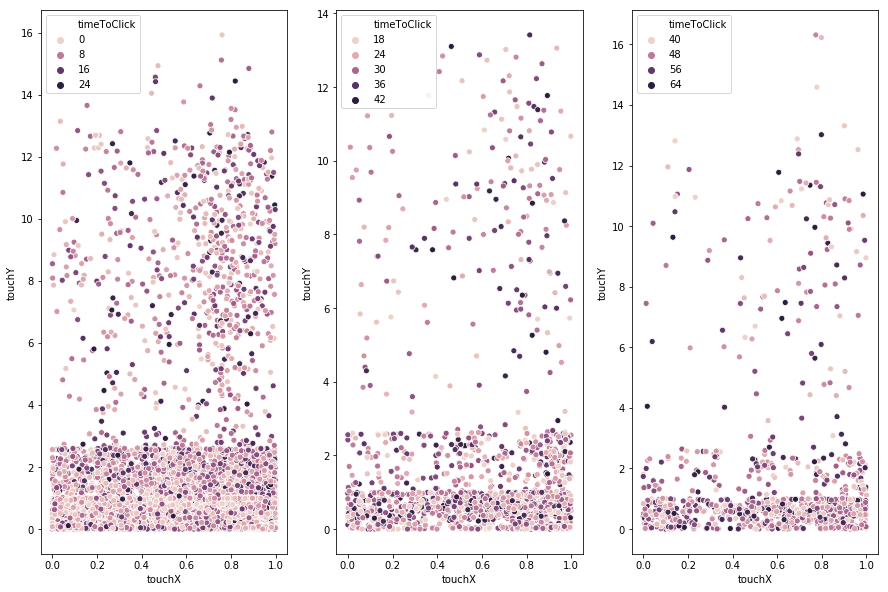

In [132]:
fig, ax = plt.subplots(1,3,figsize=(15,10))
sns.scatterplot('touchX', 'touchY', hue='timeToClick', data=temp.loc[temp.timeToClick <= 20], ax=ax[0])
sns.scatterplot('touchX', 'touchY', hue='timeToClick', data=temp.loc[temp.timeToClick.isin(range(21,40))], ax=ax[1])
sns.scatterplot('touchX', 'touchY', hue='timeToClick', data=temp.loc[temp.timeToClick >= 40], ax=ax[2])

In [38]:
clicks.ref_type.unique() # 4 ref types

array([1891515180541284343, 1494519392962156891, 5016171802147987303,
       6323871695571587575])

In [42]:
clicks.ref_hash.nunique()

17119

## Daily patterns

In [11]:
clicks.created.describe()

count                                26351
unique                               26347
top       2019-03-10 05:02:10.703000+00:00
freq                                     2
first     2019-03-05 01:17:30.663000+00:00
last      2019-03-13 23:59:59.298000+00:00
Name: created, dtype: object

In [63]:
bywday = clicks.groupby(clicks.created.dt.dayofweek).size().reset_index()

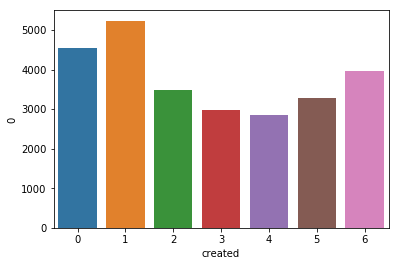

In [66]:
sns.barplot('created', 0, data=bywday)

In [74]:
byday = clicks.groupby(clicks.created.dt.dayofyear).size().to_frame('count').reset_index()

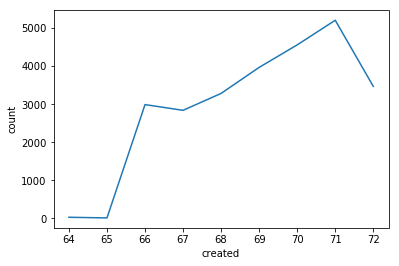

In [75]:
sns.lineplot('created', 'count', data=byday)

In [88]:
temp = (clicks.assign(day=clicks.created.dt.dayofyear, hour=clicks.created.dt.hour)
              .groupby(['day', 'hour']).size().to_frame('count').reset_index().reset_index())

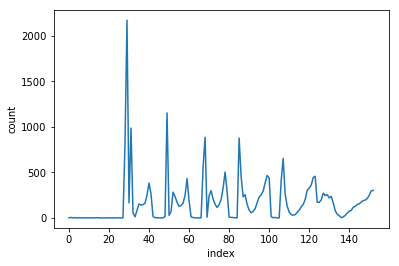

In [90]:
sns.lineplot('index', 'count', data=temp)

In [99]:
temp = (temp.pivot(index='day', columns='hour', values='count')
            .fillna(0)
            .stack()
            .to_frame('count')
            .reset_index()
            .reset_index())

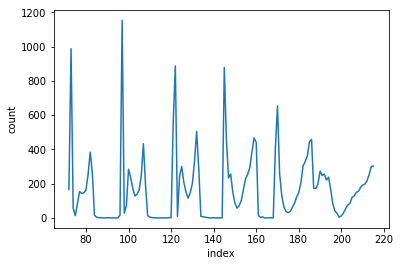

In [116]:
sns.lineplot('index', 'count', data=temp.loc[temp.day>=67])

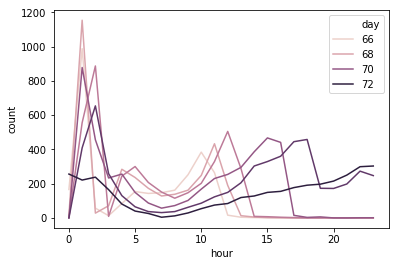

In [115]:
sns.lineplot('hour', 'count', hue='day', data=temp.loc[temp.day>=67])

In [124]:
temp = temp.assign(weekend = temp.day.map(lambda x: 1 if x in [68,69] else 0))

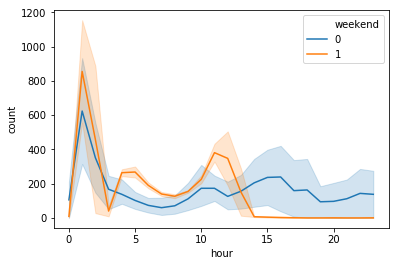

In [126]:
sns.lineplot('hour', 'count', hue='weekend', data=temp.loc[temp.day>=67])